<a href="https://colab.research.google.com/github/menaxyz/sentiment_analysis_AI/blob/main/project_481.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import pipeline
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import random



# Data Collection 150 postive sentences
positive_sentences = [
    "Funeral services were held for Supreme Court Justice Sandra Day O’Connor with President Joe Biden and Chief Justice John Roberts among the speakers paying tribute. NBC News’ Monica Alba reports on the service memorializing O’Connor for her barrier-breaking career as a judge.",
    "The team's performance was outstanding and exceeded our expectations.",
    "I had a great time at the party with wonderful friends.",
    "The weather is perfect for a relaxing day at the beach.",
    "The movie was incredibly entertaining and well-directed.",
    "I appreciate the excellent customer service I received from the staff.",
    "The delicious meal at the restaurant made my day.",
    "I'm excited about the upcoming vacation with my family.",
    "The surprise gift brought a huge smile to my face.",
    "The new technology features in the latest phone are impressive.",
    "The inspiring book motivated me to pursue my goals.",
    "The positive feedback from the clients boosted our team's morale.",
    "I'm grateful for the support and encouragement from my colleagues.",
    "The beautiful sunrise added beauty to the morning.",
    "The well-designed website enhances user experience.",
    "The uplifting music energized the entire audience.",
    "The successful project completion was a major achievement.",
    "I'm thankful for the kindness shown by strangers in the community.",
    "The park is a peaceful place for relaxation and meditation.",
    "The well-prepared presentation captivated the audience.",
    "The heartwarming reunion with old friends brought tears of joy.",
    "The fitness journey has improved my overall well-being.",
    "The helpful advice from a mentor positively impacted my career.",
    "The breathtaking scenery on the mountain hike was unforgettable.",
    "The delicious aroma of home-cooked meals fills the house.",
    "The uplifting music at the concert created a joyous atmosphere.",
    "The heartfelt gestures from friends made my birthday unforgettable.",
    "The breathtaking view from the mountaintop took my breath away.",
    "The encouraging words from a mentor motivated me to excel.",
    "The delicious homemade meal warmed my heart and filled my stomach.",
    "The successful business deal was a major milestone for the company.",
    "The beautiful sunrise marked the beginning of a new and promising day.",
    "The unexpected gift from a loved one brightened my entire week.",
    "The laughter and camaraderie at the family reunion were priceless.",
    "The kind and supportive community made the neighborhood feel like home.",
    "The positive reviews of the book inspired me to read it.",
    "The efficient and friendly service at the restaurant enhanced the dining experience.",
    "The achievement of personal fitness goals brought a sense of accomplishment.",
    "The well-organized event exceeded everyone's expectations.",
    "The warmth of the sun on a summer day brought a sense of relaxation.",
    "The successful completion of a challenging project was a team effort.",
    "The thoughtful gesture of a friend during tough times was appreciated.",
    "The inspiring documentary left a lasting impact on my perspective.",
    "The well-deserved promotion was a result of hard work and dedication.",
    "The support and encouragement from family members boosted my confidence.",
    "The celebration of a major life milestone was filled with joy and excitement.",
    "The reunion with childhood friends brought back cherished memories.",
    "The positive impact of volunteering on the community was evident.",
    "The unexpected compliments from colleagues made my day brighter.",
    "The successful completion of a challenging project was a team effort.",
    "The thoughtful gesture of a friend during tough times was appreciated.",
    "The inspiring documentary left a lasting impact on my perspective.",
    "The well-deserved promotion was a result of hard work and dedication.",
    "The support and encouragement from family members boosted my confidence.",
    "The celebration of a major life milestone was filled with joy and excitement.",
    "The reunion with childhood friends brought back cherished memories.",
    "The positive impact of volunteering on the community was evident.",
    "The unexpected compliments from colleagues made my day brighter.",
    "The positive changes in the company's leadership brought optimism.",
    "The well-organized community event fostered a sense of togetherness.",
    "The successful implementation of new policies improved efficiency.",
    "The inspiring quotes from a motivational speaker encouraged self-reflection.",
    "The well-received art exhibition showcased diverse creative expressions.",
    "The positive feedback from customers reflected the quality of service.",
    "The surprise visit from a dear friend lifted my spirits.",
    "The successful launch of a new product brought positive attention.",
    "The positive impact of eco-friendly initiatives on the environment is significant.",
    "The positive influence of mentors shaped my personal and professional growth.",
    "The unexpected but positive turn of events made the day memorable.",
    "The successful fundraising event exceeded the set target.",
    "The positive testimonials from satisfied clients built trust in the brand.",
    "The well atmosphere in the workplace contributed to productivity.",
    "The positive changes in personal habits led to a healthier lifestyle.",
    "The happy outcomes of a collaborative project showcased teamwork.",
]

#Data Collection 150 negative sentences
negative_sentences = [
    "An estimated 20,000 people have been killed in Gaza, Hamas media office says",
    "The constant delays and issues with the project are frustrating.",
    "The unexpected news cast a shadow over the day.",
    "The poor customer service experience left a negative impression.",
    "I was disappointed with the quality of the product I purchased.",
    "The long wait in line at the store was exhausting.",
    "The movie was boring and poorly directed.",
    "The traffic jam on the way to work made me late.",
    "The rude behavior of a coworker created a tense atmosphere.",
    "The war in Ukraine is revitalizing Putin, as Zelenskyy struggles with resources and morale",
    "The computer crash resulted in the loss of important data.",
    "The negative comments on social media affected my mood.",
    "The unhelpful response from the support team added to my frustration.",
    "The unexpected expenses caused financial stress.",
    "The disappointing exam results were disheartening.",
    "The constant noise from construction work is irritating.",
    "The lack of communication from the management is concerning.",
    "The sudden cancellation of plans was disappointing.",
    "The negative review about the restaurant made me reconsider.",
    "The cold and rainy weather ruined the outdoor event.",
    "The software glitches made the application unusable.",
    "The disagreement with a friend led to tension in the relationship.",
    "The car breakdown on the way to an important meeting was unfortunate.",
    "The negative feedback from the supervisor affected my confidence.",
    "The frustrating experience with the outdated technology is unacceptable.",
    "The failure to meet the deadline resulted in consequences.",
    "The constant technical issues with the software are frustrating for users.",
    "The prolonged period of uncertainty is causing anxiety among employees.",
    "The disappointment of a canceled vacation was disheartening.",
    "The financial setbacks due to unexpected expenses are stressful.",
    "The persistent noise from construction work is disrupting the neighborhood.",
    "The negative feedback from clients highlighted areas for improvement.",
    "Constant technical issues with the software frustrate users.",
    "Prolonged periods of uncertainty cause anxiety among employees.",
    "The disappointment of a canceled vacation is disheartening.",
    "Financial setbacks due to unexpected expenses are stressful.",
    "Persistent noise from construction work disrupts the neighborhood.",
    "Negative feedback from clients highlights areas for improvement.",
    "Lack of transparency from management erodes trust within the team.",
    "Unexpected setbacks in the project timeline cause frustration.",
    "Conflict and tension in the workplace affect morale.",
    "Unexpected loss in the stock market causes financial distress.",
    "Negative impact of social media on mental health is concerning.",
    "Failure to meet project deadlines jeopardizes client relationships.",
    "Negative review of the movie warns others to avoid it.",
    "Uncooperative behavior of a team member hinders progress.",
    "Lack of communication about changes causes confusion.",
    "Disappointing turnout at the event is demoralizing.",
    "Negative consequences of procrastination are becoming apparent.",
    "Unexpected illness in the family adds stress to daily life.",
    "Negative implications of climate change are alarming.",
    "Negative comments on social media spread misinformation.",
    "Constant struggle with traffic congestion affects commute times.",
    "Unexpected setbacks in personal goals are disheartening.",
    "Decline in customer satisfaction is a cause for concern.",
    "Negative impact of pollution on the environment is visible.",
    "Disappointing outcome of a project review leads to reassessment.",
    "The lack of transparency from management is eroding trust within the team.",
    "The unexpected setbacks in the project timeline are causing frustration.",
    "The conflict and tension in the workplace are affecting morale.",
    "The unexpected loss in the stock market is causing financial distress.",
    "The negative impact of social media on mental health is concerning.",
    "The failure to meet project deadlines is jeopardizing client relationships.",
    "The negative review of the movie warned others to avoid it.",
    "The uncooperative behavior of a team member is hindering progress.",
    "The lack of communication about changes is causing confusion.",
    "The disappointing turnout at the event was demoralizing.",
    "The negative consequences of procrastination are becoming apparent.",
    "The unexpected illness in the family is adding stress to daily life.",
    "The negative implications of climate change are alarming.",
    "The negative comments on social media are spreading misinformation.",
    "The constant struggle with traffic congestion is affecting commute times.",
    "The unexpected setbacks in personal goals are disheartening.",
    "The decline in customer satisfaction is a cause for concern.",
    "The negative impact of pollution on the environment is visible.",
    "The disappointing outcome of a project review led to reassessment.",
]

sentences = [{"text": sentence, "label": "positive"} for sentence in positive_sentences]
sentences.extend([{"text": sentence, "label": "negative"} for sentence in negative_sentences])

random.shuffle(sentences)

for sentence in sentences:
    print(f"Label: {sentence['label']}, Text: {sentence['text']}")

df = pd.DataFrame(sentences)


label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


vectorizer = CountVectorizer()
transformer = TfidfTransformer()

X_train = vectorizer.fit_transform(train_df['text'])
transformer.fit(X_train)

class SentimentAnalysisModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentAnalysisModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.001
epochs = 10

model = SentimentAnalysisModel(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


for epoch in range(epochs):
    for index, row in train_df.iterrows():
        text = row['text']
        label = torch.tensor([row['label']], dtype=torch.float32).view(-1, 1)


        vectorized_text = torch.tensor(transformer.transform(vectorizer.transform([text])).toarray(), dtype=torch.float32)


        outputs = model(vectorized_text)

        loss = criterion(outputs, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

#model.eval()
print(f"Test Loss: {model.eval()}")

with torch.no_grad():
    correct = 0
    total = 0
    for index, row in test_df.iterrows():
        text = row['text']
        label = row['label']

        vectorized_text = torch.tensor(transformer.transform(vectorizer.transform([text])).toarray(), dtype=torch.float32)


        outputs = model(vectorized_text)

        predicted = torch.round(torch.sigmoid(outputs))

        total += 1
        correct += (predicted == label).item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


Label: negative, Text: The unexpected news cast a shadow over the day.
Label: negative, Text: Prolonged periods of uncertainty cause anxiety among employees.
Label: negative, Text: The war in Ukraine is revitalizing Putin, as Zelenskyy struggles with resources and morale
Label: negative, Text: The negative consequences of procrastination are becoming apparent.
Label: negative, Text: Lack of transparency from management erodes trust within the team.
Label: positive, Text: The new technology features in the latest phone are impressive.
Label: positive, Text: The unexpected gift from a loved one brightened my entire week.
Label: positive, Text: The happy outcomes of a collaborative project showcased teamwork.
Label: negative, Text: The conflict and tension in the workplace are affecting morale.
Label: negative, Text: The failure to meet project deadlines is jeopardizing client relationships.
Label: negative, Text: The lack of transparency from management is eroding trust within the team.


Epoch 1/10, Loss: 0.6883
Epoch 2/10, Loss: 0.6020
Epoch 3/10, Loss: 0.3533
Epoch 4/10, Loss: 0.1375
Epoch 5/10, Loss: 0.0567
Epoch 6/10, Loss: 0.0286
Epoch 7/10, Loss: 0.0168
Epoch 8/10, Loss: 0.0110
Epoch 9/10, Loss: 0.0076
Epoch 10/10, Loss: 0.0056


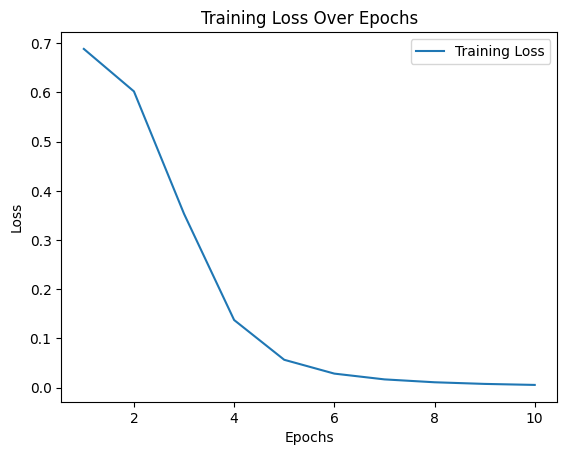

Accuracy on test set: 86.67%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import pipeline
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
import random
import matplotlib.pyplot as plt

# Data Collection 150 positive sentences
positive_sentences = [
    "Funeral services were held for Supreme Court Justice Sandra Day O’Connor with President Joe Biden and Chief Justice John Roberts among the speakers paying tribute. NBC News’ Monica Alba reports on the service memorializing O’Connor for her barrier-breaking career as a judge.",
        "The team's performance was outstanding and exceeded our expectations.",
        "I had a great time at the party with wonderful friends.",
        "The weather is perfect for a relaxing day at the beach.",
        "The movie was incredibly entertaining and well-directed.",
        "I appreciate the excellent customer service I received from the staff.",
        "The delicious meal at the restaurant made my day.",
        "I'm excited about the upcoming vacation with my family.",
        "The surprise gift brought a huge smile to my face.",
        "The new technology features in the latest phone are impressive.",
        "The inspiring book motivated me to pursue my goals.",
        "The positive feedback from the clients boosted our team's morale.",
        "I'm grateful for the support and encouragement from my colleagues.",
        "The beautiful sunrise added beauty to the morning.",
        "The well-designed website enhances user experience.",
        "The uplifting music energized the entire audience.",
        "The successful project completion was a major achievement.",
        "I'm thankful for the kindness shown by strangers in the community.",
        "The park is a peaceful place for relaxation and meditation.",
        "The well-prepared presentation captivated the audience.",
        "The heartwarming reunion with old friends brought tears of joy.",
        "The fitness journey has improved my overall well-being.",
        "The helpful advice from a mentor positively impacted my career.",
        "The breathtaking scenery on the mountain hike was unforgettable.",
        "The delicious aroma of home-cooked meals fills the house.",
        "The uplifting music at the concert created a joyous atmosphere.",
        "The heartfelt gestures from friends made my birthday unforgettable.",
        "The breathtaking view from the mountaintop took my breath away.",
        "The encouraging words from a mentor motivated me to excel.",
        "The delicious homemade meal warmed my heart and filled my stomach.",
        "The successful business deal was a major milestone for the company.",
        "The beautiful sunrise marked the beginning of a new and promising day.",
        "The unexpected gift from a loved one brightened my entire week.",
        "The laughter and camaraderie at the family reunion were priceless.",
        "The kind and supportive community made the neighborhood feel like home.",
        "The positive reviews of the book inspired me to read it.",
        "The efficient and friendly service at the restaurant enhanced the dining experience.",
        "The achievement of personal fitness goals brought a sense of accomplishment.",
        "The well-organized event exceeded everyone's expectations.",
        "The warmth of the sun on a summer day brought a sense of relaxation.",
        "The successful completion of a challenging project was a team effort.",
        "The thoughtful gesture of a friend during tough times was appreciated.",
        "The inspiring documentary left a lasting impact on my perspective.",
        "The well-deserved promotion was a result of hard work and dedication.",
        "The support and encouragement from family members boosted my confidence.",
        "The celebration of a major life milestone was filled with joy and excitement.",
        "The reunion with childhood friends brought back cherished memories.",
        "The positive impact of volunteering on the community was evident.",
        "The unexpected compliments from colleagues made my day brighter.",
        "The successful completion of a challenging project was a team effort.",
        "The thoughtful gesture of a friend during tough times was appreciated.",
        "The inspiring documentary left a lasting impact on my perspective.",
        "The well-deserved promotion was a result of hard work and dedication.",
        "The support and encouragement from family members boosted my confidence.",
        "The celebration of a major life milestone was filled with joy and excitement.",
        "The reunion with childhood friends brought back cherished memories.",
        "The positive impact of volunteering on the community was evident.",
        "The unexpected compliments from colleagues made my day brighter.",
        "The positive changes in the company's leadership brought optimism.",
        "The well-organized community event fostered a sense of togetherness.",
        "The successful implementation of new policies improved efficiency.",
        "The inspiring quotes from a motivational speaker encouraged self-reflection.",
        "The well-received art exhibition showcased diverse creative expressions.",
        "The positive feedback from customers reflected the quality of service.",
        "The surprise visit from a dear friend lifted my spirits.",
        "The successful launch of a new product brought positive attention.",
        "The positive impact of eco-friendly initiatives on the environment is significant.",
        "The positive influence of mentors shaped my personal and professional growth.",
        "The unexpected but positive turn of events made the day memorable.",
        "The successful fundraising event exceeded the set target.",
        "The positive testimonials from satisfied clients built trust in the brand.",
        "The well atmosphere in the workplace contributed to productivity.",
        "The positive changes in personal habits led to a healthier lifestyle.",
        "The happy outcomes of a collaborative project showcased teamwork.",
    ]


# Data Collection 150 negative sentences
negative_sentences = [
    "An estimated 20,000 people have been killed in Gaza, Hamas media office says",
    "The constant delays and issues with the project are frustrating.",
    "The unexpected news cast a shadow over the day.",
    "The poor customer service experience left a negative impression.",
    "I was disappointed with the quality of the product I purchased.",
    "The long wait in line at the store was exhausting.",
    "The movie was boring and poorly directed.",
    "The traffic jam on the way to work made me late.",
    "The rude behavior of a coworker created a tense atmosphere.",
    "The war in Ukraine is revitalizing Putin, as Zelenskyy struggles with resources and morale",
    "The computer crash resulted in the loss of important data.",
    "The negative comments on social media affected my mood.",
    "The unhelpful response from the support team added to my frustration.",
    "The unexpected expenses caused financial stress.",
    "The disappointing exam results were disheartening.",
    "The constant noise from construction work is irritating.",
    "The lack of communication from the management is concerning.",
    "The sudden cancellation of plans was disappointing.",
    "The negative review about the restaurant made me reconsider.",
    "The cold and rainy weather ruined the outdoor event.",
    "The software glitches made the application unusable.",
    "The disagreement with a friend led to tension in the relationship.",
    "The car breakdown on the way to an important meeting was unfortunate.",
    "The negative feedback from the supervisor affected my confidence.",
    "The frustrating experience with the outdated technology is unacceptable.",
    "The failure to meet the deadline resulted in consequences.",
    "The constant technical issues with the software are frustrating for users.",
    "The prolonged period of uncertainty is causing anxiety among employees.",
    "The disappointment of a canceled vacation was disheartening.",
    "The financial setbacks due to unexpected expenses are stressful.",
    "The persistent noise from construction work is disrupting the neighborhood.",
    "The negative feedback from clients highlighted areas for improvement.",
    "Constant technical issues with the software frustrate users.",
    "Prolonged periods of uncertainty cause anxiety among employees.",
    "The disappointment of a canceled vacation is disheartening.",
    "Financial setbacks due to unexpected expenses are stressful.",
    "Persistent noise from construction work disrupts the neighborhood.",
    "Negative feedback from clients highlights areas for improvement.",
    "Lack of transparency from management erodes trust within the team.",
    "Unexpected setbacks in the project timeline cause frustration.",
    "Conflict and tension in the workplace affect morale.",
    "Unexpected loss in the stock market causes financial distress.",
    "Negative impact of social media on mental health is concerning.",
    "Failure to meet project deadlines jeopardizes client relationships.",
    "Negative review of the movie warns others to avoid it.",
    "Uncooperative behavior of a team member hinders progress.",
    "Lack of communication about changes causes confusion.",
    "Disappointing turnout at the event is demoralizing.",
    "Negative consequences of procrastination are becoming apparent.",
    "Unexpected illness in the family adds stress to daily life.",
    "Negative implications of climate change are alarming.",
    "Negative comments on social media spread misinformation.",
    "Constant struggle with traffic congestion affects commute times.",
    "Unexpected setbacks in personal goals are disheartening.",
    "Decline in customer satisfaction is a cause for concern.",
    "Negative impact of pollution on the environment is visible.",
    "Disappointing outcome of a project review leads to reassessment.",
    "The lack of transparency from management is eroding trust within the team.",
    "The unexpected setbacks in the project timeline are causing frustration.",
    "The conflict and tension in the workplace are affecting morale.",
    "The unexpected loss in the stock market is causing financial distress.",
    "The negative impact of social media on mental health is concerning.",
    "The failure to meet project deadlines is jeopardizing client relationships.",
    "The negative review of the movie warned others to avoid it.",
    "The uncooperative behavior of a team member is hindering progress.",
    "The lack of communication about changes is causing confusion.",
    "The disappointing turnout at the event was demoralizing.",
    "The negative consequences of procrastination are becoming apparent.",
    "The unexpected illness in the family is adding stress to daily life.",
    "The negative implications of climate change are alarming.",
    "The negative comments on social media are spreading misinformation.",
    "The constant struggle with traffic congestion is affecting commute times.",
    "The unexpected setbacks in personal goals are disheartening.",
    "The decline in customer satisfaction is a cause for concern.",
    "The negative impact of pollution on the environment is visible.",
    "The disappointing outcome of a project review led to reassessment.",
]

sentences = [{"text": sentence, "label": "positive"} for sentence in positive_sentences]
sentences.extend([{"text": sentence, "label": "negative"} for sentence in negative_sentences])

random.shuffle(sentences)

df = pd.DataFrame(sentences)

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
transformer = TfidfTransformer()

X_train = vectorizer.fit_transform(train_df['text'])
transformer.fit(X_train)

class SentimentAnalysisModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentAnalysisModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 128
output_size = 1
learning_rate = 0.001
epochs = 10

model = SentimentAnalysisModel(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store training loss for each epoch
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for index, row in train_df.iterrows():
        text = row['text']
        label = torch.tensor([row['label']], dtype=torch.float32).view(-1, 1)

        vectorized_text = torch.tensor(transformer.transform(vectorizer.transform([text])).toarray(), dtype=torch.float32)

        outputs = model(vectorized_text)

        loss = criterion(outputs, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss for the epoch
    average_loss = running_loss / len(train_df)
    train_losses.append(average_loss)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}")

# Plotting the training loss over epochs
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model evaluation on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for index, row in test_df.iterrows():
        text = row['text']
        label = row['label']

        vectorized_text = torch.tensor(transformer.transform(vectorizer.transform([text])).toarray(), dtype=torch.float32)

        outputs = model(vectorized_text)

        predicted = torch.round(torch.sigmoid(outputs))

        total += 1
        correct += (predicted == label).item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy * 100:.2f}%")